# Importation des carreaux INSEE


Le fichier avec les carreaux de 1km de l'Insee est très volumineux : afin de pouvoir le télécharger un traitement a été fait sur QGIS pour extraire un "sous-fichier" qui ne contient que les lignes des carreaux situés en Île de France.

Ces données sont stockées sur un *Google Drive* sous forme d'un dossier ZIP qui contient tous les élements permettant de lire le fichier *.shp*.

Le code *donnees_INSEE.py* permet de créer une fonction qui reprend exactement ce *NoteBook* et permettra de télécharger les données de facon automatisées dans les autres parties de notre projet.

In [7]:
import geopandas as gpd
import pandas as pd
import requests
from io import BytesIO  
from zipfile import ZipFile
import tempfile
import os
import matplotlib.pyplot as plt

In [6]:
url_zip="https://drive.google.com/uc?export=download&id=1U9HT438foGzW06JdtVC3_ByA17Qipyrd"

response = requests.get(url_zip)

# Créer un répertoire temporaire pour stocker les fichiers
with tempfile.TemporaryDirectory() as tmpdirname:
    with ZipFile(BytesIO(response.content)) as zipfile:
        # Extraire tous les fichiers dans le répertoire temporaire
        zipfile.extractall(tmpdirname)

        # Rechercher le fichier .shp dans le répertoire temporaire
        for file_name in os.listdir(tmpdirname):
            if file_name.endswith('.shp'):
                shp_path = os.path.join(tmpdirname, file_name)
                data = gpd.read_file(shp_path)  

In [6]:
data.head()

,Idcar_1km,I_est_1km,Ind,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,Men_coll,...,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,Men_pauv,Men,lcog_geo,selection,geometry
0,CRS3035RES1000mN2778000E3841000,1,23.0,4.8,0.0,9.6,0.7,603810.8,1277.7,0.7,...,0.7,4.8,6.0,1.2,0.0,0.7,11.5,8928289200,1,"POLYGON ((742652.218 6758728.426, 742560.540 6..."
1,CRS3035RES1000mN2778000E3842000,1,13.0,0.9,0.5,4.1,0.0,292392.8,628.1,0.0,...,1.3,2.3,1.8,0.0,0.0,0.5,4.9,8920089282,1,"POLYGON ((743647.340 6758822.504, 743555.669 6..."
2,CRS3035RES1000mN2778000E3843000,0,90.0,4.9,2.0,28.0,0.0,2114234.0,3647.0,0.0,...,16.1,13.0,11.0,2.1,0.0,1.0,33.9,8920089268,1,"POLYGON ((744642.460 6758916.571, 744550.795 6..."
3,CRS3035RES1000mN2779000E3834000,0,99.0,13.0,1.0,36.0,4.0,2289892.1,3748.0,0.0,...,18.0,20.0,14.0,4.0,0.0,3.0,42.0,8908589152,1,"POLYGON ((735594.600 6759064.463, 735502.871 6..."
4,CRS3035RES1000mN2779000E3835000,0,112.0,15.0,2.0,39.0,4.0,2546506.8,4404.9,4.0,...,19.0,15.1,22.0,5.0,0.0,2.0,48.0,89085,1,"POLYGON ((736589.739 6759158.626, 736498.016 6..."


<Axes: >

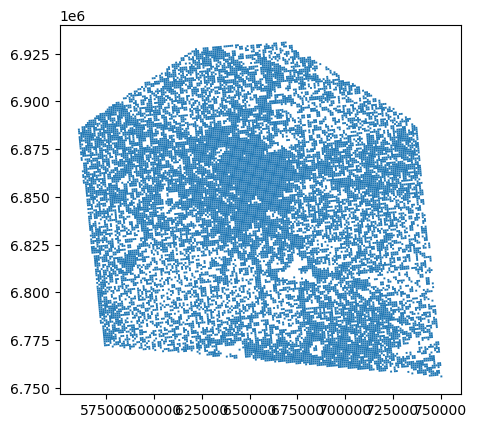

In [4]:
data.plot()